In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [28]:
data = pd.read_excel("Motor Trend Car Road Tests.xlsx")
data.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


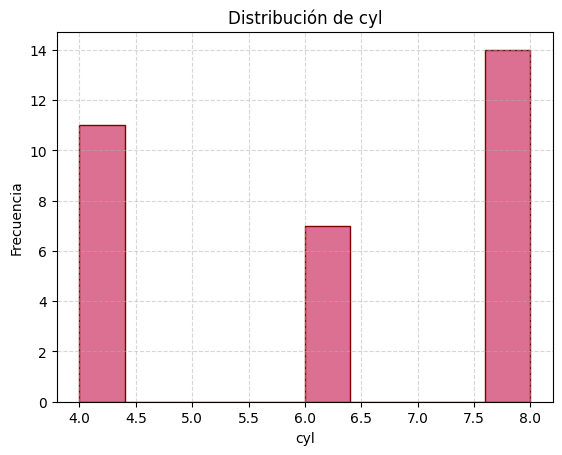

In [29]:
plt.hist(data['cyl'], bins=10, edgecolor='maroon', color = "palevioletred")
plt.title('Distribución de cyl')
plt.xlabel('cyl')
plt.ylabel('Frecuencia')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [30]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
x = data.drop(columns=['mpg', 'model'])
y = data['mpg']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.4, random_state = 137)

In [32]:
scaler = StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

In [33]:
ols = sm.OLS(y_train, sm.add_constant(x_scaled))
results = ols.fit()
warnings.filterwarnings('ignore')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     9.981
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.242
Time:                        17:43:23   Log-Likelihood:                -9.9811
No. Observations:                  12   AIC:                             41.96
Df Residuals:                       1   BIC:                             47.30
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4333      0.556     31.361      0.020      10.370      24.497
x1            40.7571     54.010      0.755      0.588    -645.499     727.013
x2            -2.4635      3.021     -0.815      0.565     -40.854      35.927
x3           -10.1581     19.484     -0.521      0.694    -257.727     237.411
x4            14.1135     13.469      1.048      0.485    -157.022     185.249
x5            -0.8005      3.106     -0.258      0.839     -40.266      38.665
x6             1.5727      3.475      0.453      0.729     -42.583      45.729
x7            32.4926     41.262      0.787      0.575    -491.795     556.780
x8            36.1394     42.669      0.847      0.553    -506.022     578.301
x9           -38.3551     43.625     -0.879      0.541    -592.668     515.958
x10           11.9707     17.482      0.685      0.618    -210.157     234.098
==============================================================================
Omnibus:                        0.259   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.413
Skew:                           0.212   Prob(JB):                        0.813
Kurtosis:                       2.196   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_test_scaled = scaler.transform(x_test)
y_pred = results.predict(sm.add_constant(x_test_scaled))
r2 = r2_score(y_test, y_pred)
r2

-54.07178520418726